# Loan Eligibility Prediction System

we are going to build a machine learning model which is going to decide whether a loan can be granted or not by predicting whether the loan requester can repay the loan or not. The model is going to decide this by looking at a majority of parameters.

## Importing The Required Packages

We will now import our required packages for building this system. They are :-

1. NumPy
2. Scikit-Learn
3. Pandas
4. Seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Getting The Data

We have got our required dataset from [Analytics Vidhya](https://www.analyticsvidhya.com/).

The dataset contains the following features :-

* Loan_ID - The ID number of the Loan application
* Gender - The Gender of the applicant
* Married - Whether the applicant is married or not
* Dependents - How many is dependant on the applicant financially
* Education  - What is the Highest Education Qualification of the Applicant
* Self_Employed - Is the Applicant self-employed?
* ApplicantIncome - What is the Applicant's income?
* CoapplcantIncome - What is the Co-Applicant's income?
* LoanAmount - What is the principal loan amount?
* Loan_Amount_Term - What is the loan term?
* Credit_History - The history of Applicant's credit
* Property_Areas - Where are the Applicant's collateral property located?
* Loan_Status - Should the loan be approved or not? (target feature)

We will now import our required datasets.

In [2]:
# Importing the training dataset

train = pd.read_csv('data/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Importing the testing dataset

test = pd.read_csv('data/test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We will take the copies of the orignal dataset. So we can revert our working dataset back if we run into some problems.

In [4]:
train_origninal = train
test_original = test

Make note that the testing data doesn't have the `Loan_Status` feature as we will be making our model predict it on this dataset.

## Exploring the data

We will now explore our data to get more insights out of it

Y    422
N    192
Name: Loan_Status, dtype: int64


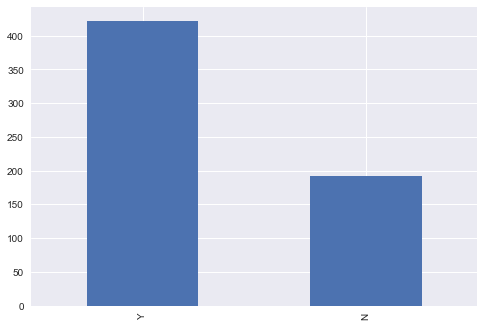

In [5]:
print(train['Loan_Status'].value_counts())
train['Loan_Status'].value_counts().plot.bar();

As we can see from above, in our training dataset, 422 loans were approved out of 614

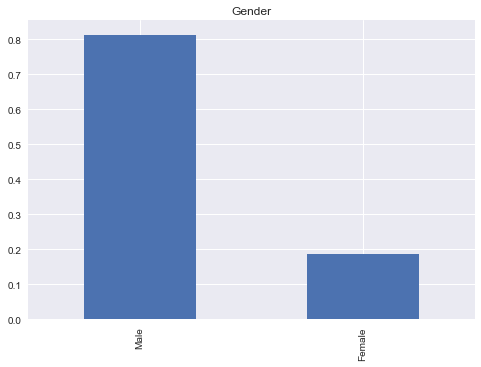

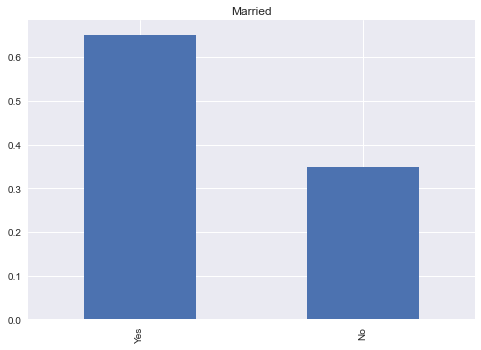

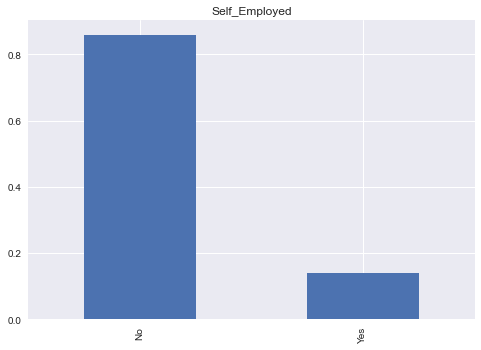

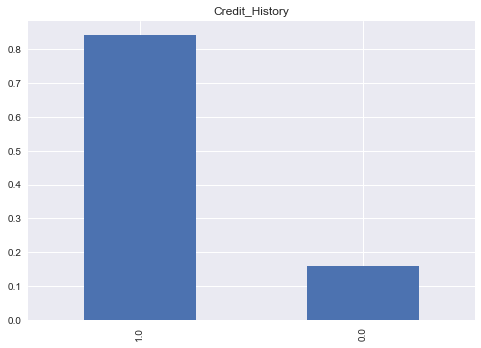

In [6]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

From the above plots we can come to know that :-

1. 80% of loan applicants are male.
2. ~65% of applicants are married.
3. 15% of applicants are self-employed.
4. 85% of applicants have repaid their pervious loans.

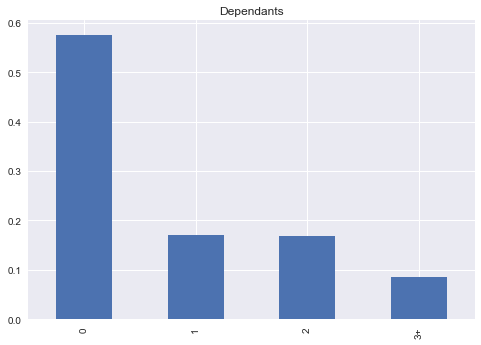

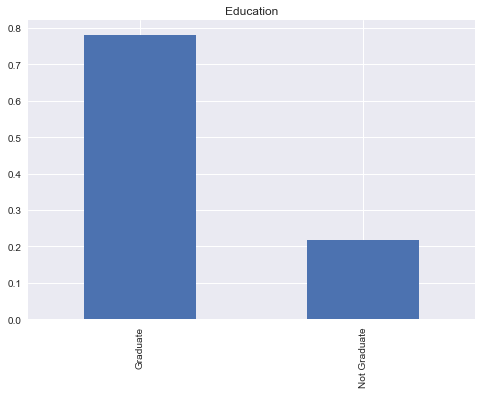

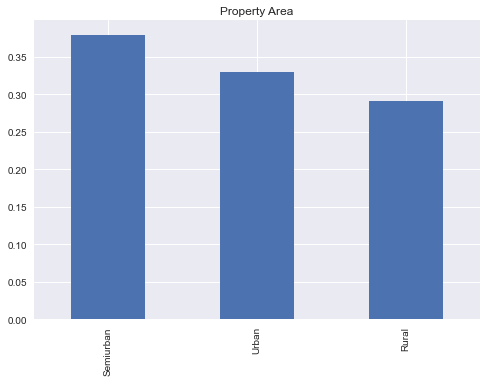

In [7]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependants')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area');

The following observations are made :-

1. Most applicants have no dependants
2. ~80% of applicants are graduates
3. Most applicants have property in semi-urban areas

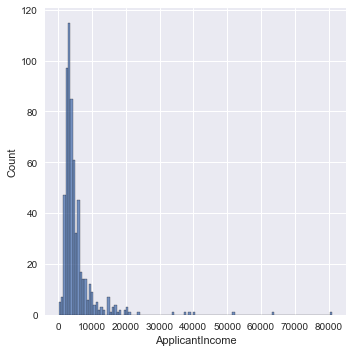

In [8]:
sns.displot(train['ApplicantIncome']);

It can be inferred from the above plot that the income of the applicants are not equally distributed. We will try to normalize it later as algorithms tend to work better on equally distributed data.

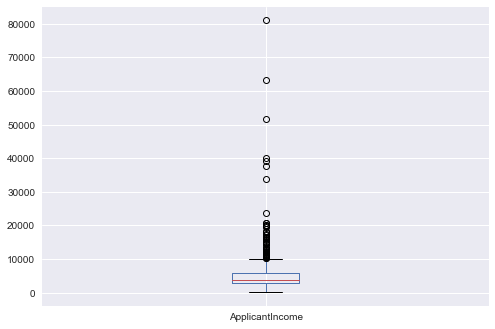

In [9]:
train['ApplicantIncome'].plot.box();

This plot tells us about the varying levels of outliers or extreme values which are present in the data. It also explains the disparity present in the income of the applicants. This maybe due to the reason we are looking at people from different educational backgrounds. We will now segregate them based on their educational qualifications.

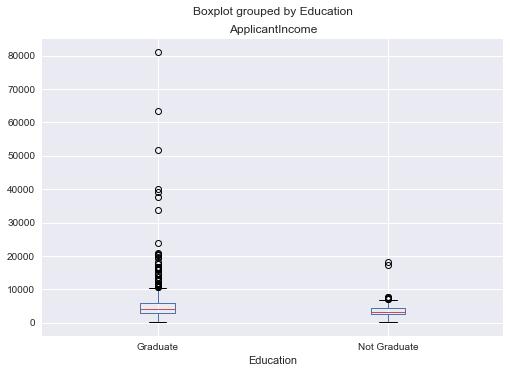

In [10]:
train.boxplot(column='ApplicantIncome', by='Education');

We can see that the higher number of graduates were the reason for the outliers. We also can note that graduated people tend to have higher income than the other category.

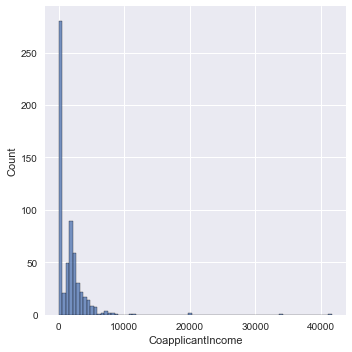

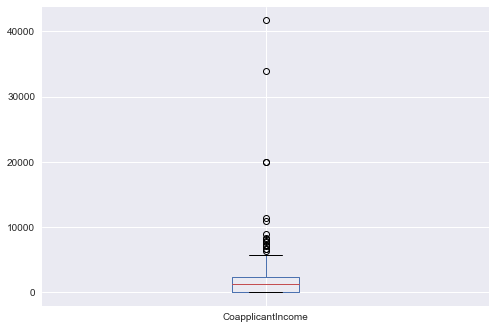

In [11]:
sns.displot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box();

We see a distribution which is similar to the previous one. We also see a high amount of outliers.

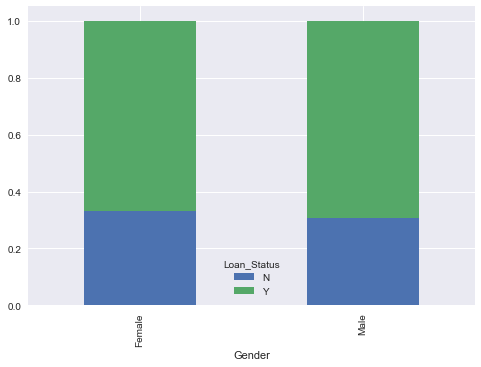

In [12]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

It is clear that the portion of female and male applicants whose loans got approved are more or less the same.

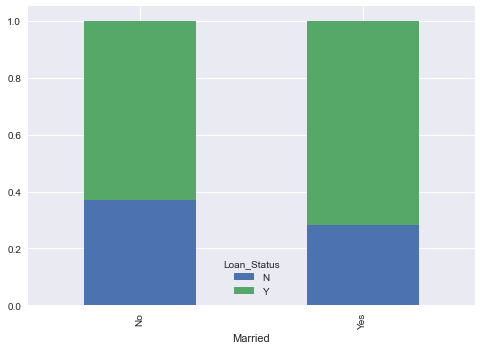

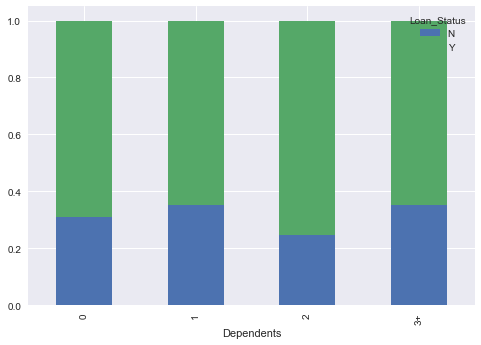

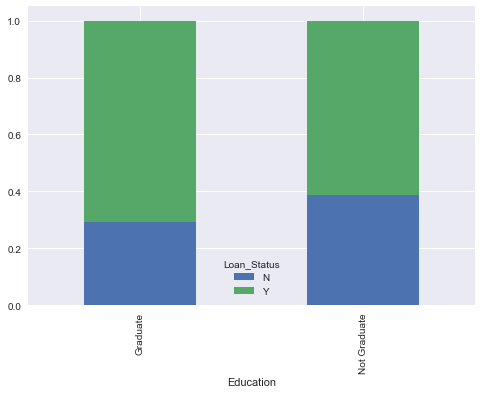

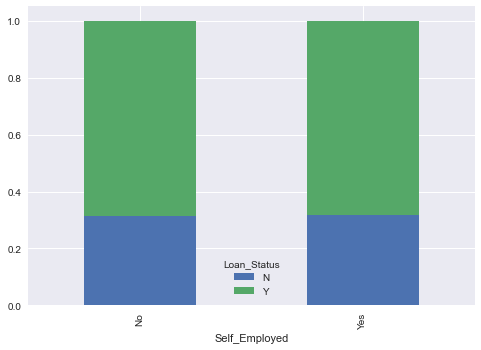

In [13]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

From the above graphs we can understand the following :-

* The number of approved loans is higher for married applicants.
* Applicants with 1 or 3+ dependants have the same chance to get their loans approved.

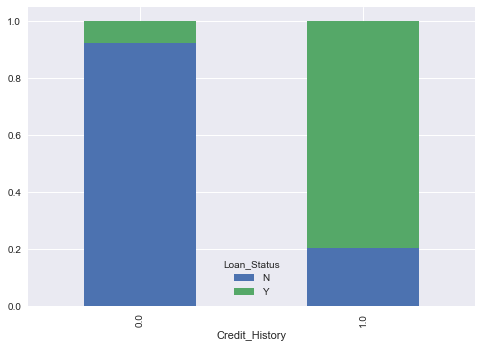

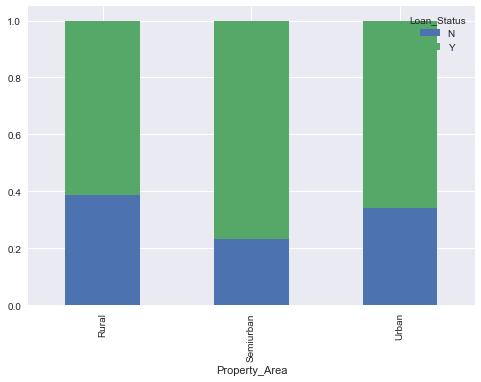

In [14]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

By plotting the remaining categorical variables against `Loan_Status` :-

* There is a huge chance for the loan to be approved if the applicant doesn't have any credit history.
* Interestingly, the chancee of getting loan approved if the property is present in semi-urban area is more than rural and urban areas.

### Numerical variable vs Target Variable

We will now make analysis on the numerical categories with target variable.

Let's try to find out the relationship between the `ApplicantIncome` and `loan_Status`

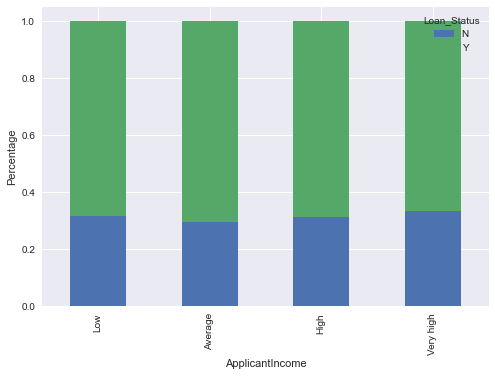

In [15]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It is clear that the `ApplicantIncome` doesn't have any influence over `Loan_Status`.

We will do a similar analysis on the `CoapplicantIncome`.

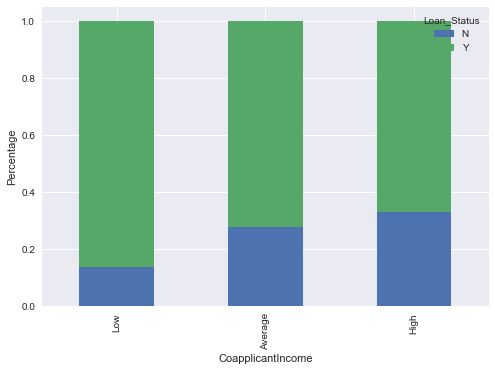

In [16]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

This shows that, if the `CoapplicantIncome` is low then there is a higher chance for the loan to be approved, but that doesn't make any sense. The reason for this maybe due to many applicant's being not married. Hence, the `CoapplicantIncome` in their data will be `0`. 

We will now create a new numerical variable, `TotalIncome` and see whether it has some relationship with `Loan_Status`.

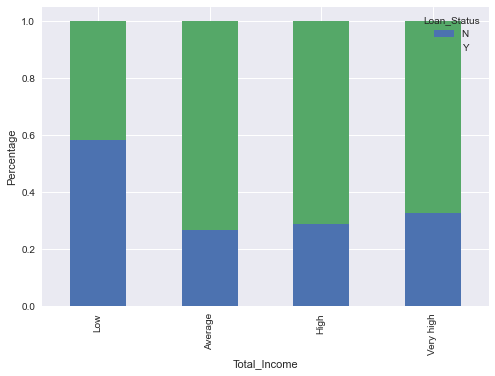

In [17]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

Now we can see that, the chance of the loan to be approved is low if the `Total_Income` is low, which makes sense.

Now let's visualize the relationship between `LoanAmount` and `Loan_Status` 

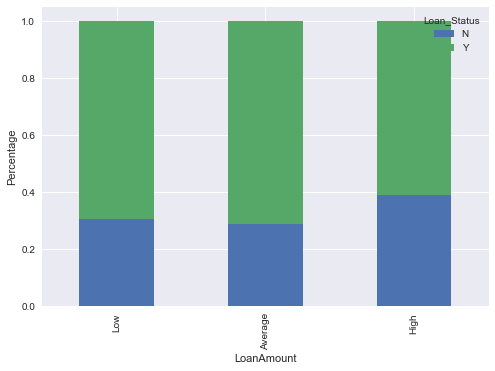

In [18]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

Clearly, there is a higher chance for the loan to be approved, if the `LoanAmount` is lower.

Now let's drop the columns which we previously created for data exploration. When we are at it we well change `3+` data values in `Dependants` column to `3`, so that it becomes a numerical variable. We will also change the target variable to `1` and `0`, since many logisitc regression algorithms depend on a numerical target variable.

In [19]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Let's create a heatmap to look at the co-relation between the numerical variables. This will give us some useful insight about the data whcih we might have previously missed.

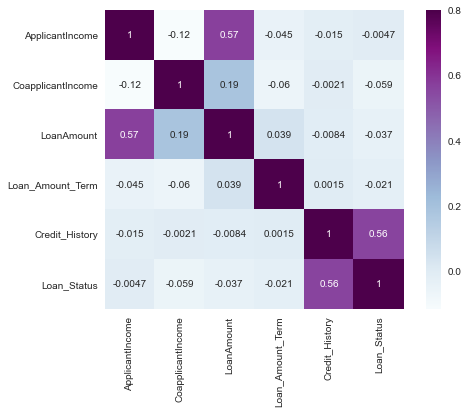

In [20]:
matrix = train.corr()
f, ax = plt.subplots()
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True);

## Data Imputation

Our dataset consists of many missing values. At it's current state we will not be able to train a ML model on it. So let's start dealing with this missing values.

In [21]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So there are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.

We will first deal with Gender, Married, Dependents, Credit_History, and Self_Employed

In [22]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [23]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Let's try to find out the value count of Loan_Amount variable 

In [24]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

As the value 360 is repeating the most, we will replace the missing values with this value.

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

The only variable that haven't been imputed as of now is the `LoanAmount`, as it is a numerical variable we can either use mean or median to impute the missing values. But since we noted a lot of outliers in `LoanAmount` previously, it's better to use median than mean in this case.

In [26]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now our training dataset is free from missing values.

Let's fill all the missing values in our test dataset as well.

In [28]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [29]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Our test dataset is free from missing values now as well.

## Outlier Treatment

Outliers in dataset are really bad. They will mess up our data distribution along with statistical values like `mean` and `standard deviation`. We have to deal with them to prevent any mishaps.

As we saw earlier, the `LoanAmoount` data values had lots of outliers in the left side, and the distribution was more tighter in the right side, hence it is called as Right-Skewed Distribution. One of the ways to remove it is by performing a `log transformation`.

Now let's perform it on our train and test datasets.

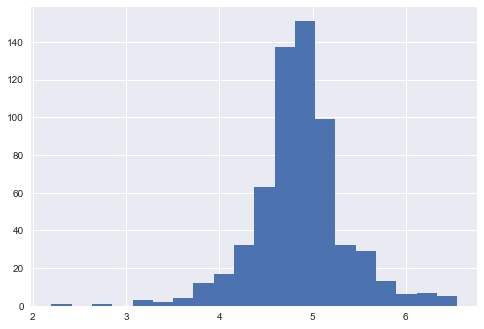

In [30]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

As explained early, now the distribution is much more tighter and most of the outliers which were previously there has been removed.

## Model Training

We will start of with a simple Logistic Regression Model.

* Logistic Regression is a model which classifies binary outcomes (0 for False and 1 for True).
* Logistic Regression works of a logit function which is a set of log of odds for a particular event.
* The model create an sigmoid shaped curve for the probablity estimate.

We will first drop the `Loan_ID` feature which will not have any influence on the target variable.

In [31]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

To train any mode we need a target variable, so let's assign it as `y` and remaining values as `X`.

In [32]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Next up we have to one-hot encode our categorical features. This type of encoding turns our categorical features into `0` and `1`, hence making our model to 'understand' the categorical features.

![](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

To do this we will use scikit-learn's one hot encoder.

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# let's create an object for OneHotEncoder
one_hot = OneHotEncoder()

# Creating an array that contains the names of the features to be encoded
categories = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Property_Area', 'Education']

# Let's create a ColumnTransformer now
transformer = ColumnTransformer([('one_hot',
                                 one_hot, 
                                 categories)],
                                remainder='passthrough')

X_transformed = transformer.fit_transform(X)
train_transformed = transformer.fit_transform(train)
test_transformed = transformer.fit_transform(test)

Now that our dataset is ready for training a model on it. We have to first split it into train and validation sets, so that we will be able to evaluate our model once it's ready. 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_v, y_train, y_v = train_test_split(X_transformed, y, test_size=0.2)

The dataset is now ready to model training and testing.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
# grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
# grid_search.fit(X_train, y_train)
# grid_search.best_estimator_

model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_v)
accuracy_score(y_v, prediction)

0.8048780487804879

So our model has an accuray of ~80%. Now let's test it on the test dataset.